In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from matplotlib import cm
import matplotlib as mpl
from cycler import cycler
from matplotlib import rc
import scipy.stats
from sklearn.metrics import explained_variance_score
import seaborn as sns

In [2]:
true4_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy"))
true4_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
true4_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
true4_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1_set1.npy")[-50000*20:].reshape(20,50000)

true8_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true8_na = np.load("/media/hdd01/sklee/CA1_clust8-30/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true8_nona = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true8_diff = np.load("/media/hdd01/sklee/CA1_clust8-30/data/V_diff_stimseed1.npy")[-50000*20:].reshape(20,50000)

true12_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true12_na = np.load("/media/hdd01/sklee/CA1_clust12-20/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true12_nona = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true12_diff = np.load("/media/hdd01/sklee/CA1_clust12-20/data/V_diff_stimseed1.npy")[-50000*20:].reshape(20,50000)

one4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h1_output.npz")["test"] + true4_nona_mean
two4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h2_output.npz")["test"] + true4_nona_mean
gru4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"] + true4_nona_mean
one4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h1_output.npz")["test"]
two4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["test"]
gru4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]

one8_nona_test = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/glm_s14_h1_output.npz")["test"] + true8_nona_mean
two8_nona_test = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/glm_s14_h2_output.npz")["test"] + true8_nona_mean
gru8_nona_test = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/gru_s14_h20_output.npz")["test"] + true8_nona_mean
one8_diff_test = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/glm_s14_h1_output.npz")["test"]
two8_diff_test = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/glm_s14_h2_output.npz")["test"]
gru8_diff_test = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/gru_s14_h20_output.npz")["test"]

one12_nona_test = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/glm_s18_h1_output.npz")["test"] + true12_nona_mean
two12_nona_test = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/glm_s18_h2_output.npz")["test"] + true12_nona_mean
gru12_nona_test = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/gru_s18_h20_output.npz")["test"] + true12_nona_mean
one12_diff_test = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/glm_s18_h1_output.npz")["test"]
two12_diff_test = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/glm_s18_h2_output.npz")["test"]
gru12_diff_test = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/gru_s18_h20_output.npz")["test"]

two4_diff_ekern = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["e_kern"]
two4_diff_ikern = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["i_kern"]
two4_diff_nonlin = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["nonlin_in"]

one4_diff_subout = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h1_output.npz")["sub_out"][-1,-4:]
two4_diff_subout = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["sub_out"][-1,-4:]
gru4_diff_subout = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["sub_out"][-1,-4:]
one4_nona_subout = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h1_output.npz")["sub_out"][-1,-4:]
two4_nona_subout = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h2_output.npz")["sub_out"][-1,-4:]
gru4_nona_subout = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["sub_out"][-1,-4:]
true4_dend_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy").reshape(4,1000,50001)[:,-1,:50000]
true4_dend_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy").reshape(4,1000,50001)[:,-1,:50000]
true4_dend = true4_dend_na - true4_dend_nona
true4_dend_nona = true4_dend_nona - np.mean(true4_dend_nona, 1).reshape(-1,1)
one4_nona_subout -= np.mean(one4_nona_subout, 1).reshape(-1,1)
two4_nona_subout -= np.mean(two4_nona_subout, 1).reshape(-1,1)
gru4_nona_subout -= np.mean(gru4_nona_subout, 1).reshape(-1,1)

one4_diff_subout -= np.mean(one4_diff_subout, axis=1).reshape(-1,1)
two4_diff_subout -= np.mean(two4_diff_subout, axis=1).reshape(-1,1)
gru4_diff_subout -= np.mean(gru4_diff_subout, axis=1).reshape(-1,1)

In [3]:
diff_var_exp_array = np.zeros((3,3,20))
nona_var_exp_array = np.zeros((3,3,20))

for i in range(20):
    diff_var_exp_array[0,0,i] = explained_variance_score(true4_diff[i], one4_diff_test[i])
    diff_var_exp_array[0,1,i] = explained_variance_score(true4_diff[i], two4_diff_test[i])
    diff_var_exp_array[0,2,i] = explained_variance_score(true4_diff[i], gru4_diff_test[i])
    nona_var_exp_array[0,0,i] = explained_variance_score(true4_nona[i], one4_nona_test[i])
    nona_var_exp_array[0,1,i] = explained_variance_score(true4_nona[i], two4_nona_test[i])
    nona_var_exp_array[0,2,i] = explained_variance_score(true4_nona[i], gru4_nona_test[i])
    
    diff_var_exp_array[1,0,i] = explained_variance_score(true8_diff[i], one8_diff_test[i])
    diff_var_exp_array[1,1,i] = explained_variance_score(true8_diff[i], two8_diff_test[i])
    diff_var_exp_array[1,2,i] = explained_variance_score(true8_diff[i], gru8_diff_test[i])
    nona_var_exp_array[1,0,i] = explained_variance_score(true8_nona[i], one8_nona_test[i])
    nona_var_exp_array[1,1,i] = explained_variance_score(true8_nona[i], two8_nona_test[i])
    nona_var_exp_array[1,2,i] = explained_variance_score(true8_nona[i], gru8_nona_test[i])
    
    diff_var_exp_array[2,0,i] = explained_variance_score(true12_diff[i], one12_diff_test[i])
    diff_var_exp_array[2,1,i] = explained_variance_score(true12_diff[i], two12_diff_test[i])
    diff_var_exp_array[2,2,i] = explained_variance_score(true12_diff[i], gru12_diff_test[i])
    nona_var_exp_array[2,0,i] = explained_variance_score(true12_nona[i], one12_nona_test[i])
    nona_var_exp_array[2,1,i] = explained_variance_score(true12_nona[i], two12_nona_test[i])
    nona_var_exp_array[2,2,i] = explained_variance_score(true12_nona[i], gru12_nona_test[i])
    
thresh_bin_no = 200

nona_means = np.zeros((thresh_bin_no, 4))
nona_stds = np.zeros((thresh_bin_no, 4))
nona_bins = np.linspace(np.min(true4_nona), np.max(true4_nona), thresh_bin_no+1)

diff_means = np.zeros((thresh_bin_no, 4))
diff_stds = np.zeros((thresh_bin_no, 4))
diff_bins = np.linspace(np.min(true4_diff), np.max(true4_diff), thresh_bin_no+1)

for i in range(thresh_bin_no):
    
    nona_idx = np.where((true4_nona.flatten() >= nona_bins[i]) & (true4_nona.flatten() < nona_bins[i+1]))[0]
    nona_means[i,1] = np.mean(one4_nona_test.flatten()[nona_idx])
    nona_means[i,2] = np.mean(two4_nona_test.flatten()[nona_idx])
    nona_means[i,3] = np.mean(gru4_nona_test.flatten()[nona_idx])
    nona_means[i,0] = (nona_bins[i] + nona_bins[i+1])/2
    nona_stds[i,0] = (nona_bins[i] + nona_bins[i+1])/2
    nona_stds[i,1] = np.std(one4_nona_test.flatten()[nona_idx])
    nona_stds[i,2] = np.std(two4_nona_test.flatten()[nona_idx])
    nona_stds[i,3] = np.std(gru4_nona_test.flatten()[nona_idx])
    
    diff_idx = np.where((true4_diff.flatten() >= diff_bins[i]) & (true4_diff.flatten() < diff_bins[i+1]))[0]
    diff_means[i,1] = np.mean(one4_diff_test.flatten()[diff_idx])
    diff_means[i,2] = np.mean(two4_diff_test.flatten()[diff_idx])
    diff_means[i,3] = np.mean(gru4_diff_test.flatten()[diff_idx])
    diff_means[i,0] = (diff_bins[i] + diff_bins[i+1])/2
    diff_stds[i,0] = (diff_bins[i] + diff_bins[i+1])/2
    diff_stds[i,1] = np.std(one4_diff_test.flatten()[diff_idx])
    diff_stds[i,2] = np.std(two4_diff_test.flatten()[diff_idx])
    diff_stds[i,3] = np.std(gru4_diff_test.flatten()[diff_idx])
    

/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_15544/772735996.py:283: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_15544/772735996.py:285: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.savefig("/home/sklee/dendrite/fig_twostage/fig_twostage_raw.pdf", bbox_inches="tight", transparent=True)
/home/sklee/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


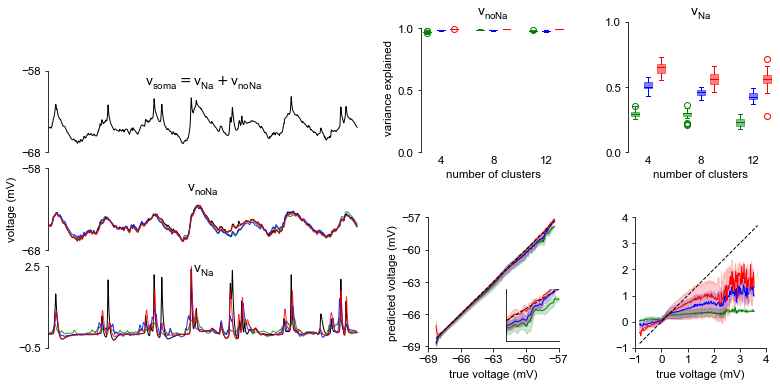

In [6]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '11.5'
bin_no = 250

fig = plt.figure(constrained_layout=True, figsize = (13,6))
gs = fig.add_gridspec(7,18, wspace=1, hspace=0.5)
ax1 = fig.add_subplot(gs[1:3,:8])
ax2 = fig.add_subplot(gs[3:5,:8])
ax3 = fig.add_subplot(gs[5:7,:8])

ax4 = fig.add_subplot(gs[:3,9:13])
ax5 = fig.add_subplot(gs[:3,14:18])

ax14 = fig.add_subplot(gs[4:7,14:18])
ax15 = fig.add_subplot(gs[4:7,9:13])

ax1.plot(np.arange(0,0.8,1/5000), true4_na[-1][17000:21000], linewidth=1, color="black")
ax1.margins(x=0.005, y=0.005)
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.spines.left.set_bounds(-68,-58)
ax1.set_yticks([-68,-58])
ax1.set_xticks([])
ax1.set_title("$\mathregular{v_{soma}} = \mathregular{v_{Na}} + \mathregular{v_{noNa}}$", y=0.75)

ax2.plot(np.arange(0,0.8,1/5000), true4_nona[-1][17000:21000], linewidth=1, color="black", label="target")
ax2.plot(np.arange(0,0.8,1/5000), one4_nona_test[-1][17000:21000], linewidth=1, color="green", label="static", alpha=0.8)
ax2.plot(np.arange(0,0.8,1/5000), two4_nona_test[-1][17000:21000], linewidth=1, color="blue", label="static w/ multiplex", alpha=0.8)
ax2.plot(np.arange(0,0.8,1/5000), gru4_nona_test[-1][17000:21000], linewidth=1, color="red", label="dynamic", alpha=0.8)
ax2.margins(x=0.005, y=0.005)
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_bounds(-68,-58)
#ax2.legend(loc=(0.03,0.5), fontsize=11, frameon=False)
ax2.set_yticks([-68,-58])
ax2.set_xticks([])
ax2.set_ylabel("voltage (mV)")
ax2.set_title("$\mathregular{v_{noNa}}$", y=0.65)

ax3.plot(np.arange(0,0.8,1/5000), true4_diff[-1][17000:21000], linewidth=1, color="black")
ax3.plot(np.arange(0,0.8,1/5000), one4_diff_test[-1][17000:21000], linewidth=1, color="green", label="static", alpha=0.8)
ax3.plot(np.arange(0,0.8,1/5000), two4_diff_test[-1][17000:21000], linewidth=1, color="blue", label="static w/ multiplex", alpha=0.8)
ax3.plot(np.arange(0,0.8,1/5000), gru4_diff_test[-1][17000:21000], linewidth=1, color="red", label="dynamic", alpha=0.8)
ax3.margins(x=0.005, y=0.005)
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.spines.bottom.set_visible(False)
ax3.spines.left.set_bounds(-0.5,2.5)
ax3.set_yticks([-0.5,2.5])
ax3.set_xticks([])
ax3.set_title("$\mathregular{v_{Na}}$", y=0.85)

colors = ["green", "blue", "red"]
cap_colors = ["green", "green", "blue", "blue", "red", "red"]

# first boxplot pair
bp = ax5.boxplot(diff_var_exp_array[0].T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for i in range(diff_var_exp_array[0].shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(diff_var_exp_array[0].shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
# second boxplot pair
bp = ax5.boxplot(diff_var_exp_array[1].T, positions = [5,6,7], widths = 0.6, patch_artist=True)
for i in range(diff_var_exp_array[1].shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(diff_var_exp_array[1].shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
# thrid boxplot pair
bp = ax5.boxplot(diff_var_exp_array[2].T, positions = [9,10,11], widths = 0.6, patch_artist=True)
for i in range(diff_var_exp_array[2].shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(diff_var_exp_array[2].shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
ax5.set_xticks([2,6,10])
ax5.set_xticklabels(["4", "8", "12"])
ax5.set_xlabel("number of clusters")
ax5.set_ylim(0,1)
ax5.margins(x=0.005, y=0.005)
ax5.spines.right.set_visible(False)
ax5.spines.top.set_visible(False)
ax5.set_title("$\mathregular{v_{Na}}$")
ax5.spines.bottom.set_visible(False)
ax5.tick_params(axis="x", length=0)
ax5.set_yticks(np.arange(0,1.01,0.5))
ax5.spines.left.set_bounds((0,1))

#hB, = ax4.plot(1,1,'blue')
#hR, = ax4.plot(1,1,'red')
#hG, = ax4.plot(1,1,'green')
#ax4.legend((hG, hB, hR),('1-plex GLM', '2-plex GLM', 'GRU'))
#hB.set_visible(False)
#hR.set_visible(False)
#hG.set_visible(False)

# first boxplot pair
bp = ax4.boxplot(nona_var_exp_array[0].T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for i in range(nona_var_exp_array[0].shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(nona_var_exp_array[0].shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
# second boxplot pair
bp = ax4.boxplot(nona_var_exp_array[1].T, positions = [5,6,7], widths = 0.6, patch_artist=True)
for i in range(nona_var_exp_array[1].shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(nona_var_exp_array[1].shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
# thrid boxplot pair
bp = ax4.boxplot(nona_var_exp_array[2].T, positions = [9,10,11], widths = 0.6, patch_artist=True)
for i in range(nona_var_exp_array[2].shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(nona_var_exp_array[2].shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
ax4.set_xticks([2,6,10])
ax4.set_xticklabels(["4", "8", "12"])
ax4.set_xlabel("number of clusters")
ax4.set_ylim(0,1.05)
ax4.margins(x=0.005, y=0.005)
ax4.spines.right.set_visible(False)
ax4.spines.top.set_visible(False)
ax4.spines.bottom.set_visible(False)
ax4.tick_params(axis="x", length=0)
ax4.set_title("$\mathregular{v_{noNa}}$")
ax4.set_ylabel("variance explained")
ax4.set_yticks(np.arange(0,1.01,0.5))
ax4.spines.left.set_bounds((0,1))

"""
ins = ax4.inset_axes([0.25,0.2,0.8,0.35])
# first boxplot pair
bp = ins.boxplot(nona_var_exp_array[0].T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for i in range(nona_var_exp_array[0].shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(nona_var_exp_array[0].shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
# second boxplot pair
bp = ins.boxplot(nona_var_exp_array[1].T, positions = [5,6,7], widths = 0.6, patch_artist=True)
for i in range(nona_var_exp_array[1].shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(nona_var_exp_array[1].shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
# thrid boxplot pair
bp = ins.boxplot(nona_var_exp_array[2].T, positions = [9,10,11], widths = 0.6, patch_artist=True)
for i in range(nona_var_exp_array[2].shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(nona_var_exp_array[2].shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.set_xticks([])
ins.set_ylim(0.95,1)
ins.set_yticks([0.96,1])
ins.spines.left.set_bounds((0.96,1))
"""
hB, = ax5.plot(1,1,'blue')
hR, = ax5.plot(1,1,'red')
hG, = ax5.plot(1,1,'green')
#ax5.legend((hG, hB, hR),('1-plex GLM', '2-plex GLM', 'GRU'))
hB.set_visible(False)
hR.set_visible(False)
hG.set_visible(False)


ax15.plot(nona_means[:,0],nona_means[:,1], linewidth=1, color="green")
ax15.plot(nona_means[:,0],nona_means[:,2], linewidth=1, color="blue")
ax15.plot(nona_means[:,0],nona_means[:,3], linewidth=1, color="red")
ax15.fill_between(nona_means[:,0], nona_means[:,1]-nona_stds[:,1], nona_means[:,1]+nona_stds[:,1], color="green", alpha=0.2, label="static")
ax15.fill_between(nona_means[:,0], nona_means[:,2]-nona_stds[:,2], nona_means[:,2]+nona_stds[:,2], color="blue", alpha=0.2, label="static w/ multiplex")
ax15.fill_between(nona_means[:,0], nona_means[:,2]-nona_stds[:,3], nona_means[:,3]+nona_stds[:,3], color="red", alpha=0.2, label="dynamic")
ax15.plot(nona_means[:,0], nona_means[:,0], linewidth=1, color="black", linestyle="--")
ax15.margins(x=0.005, y=0.005)
ax15.spines.right.set_visible(False)
ax15.spines.top.set_visible(False)
ax15.set_ylabel("predicted voltage (mV)")
ax15.set_xlabel("true voltage (mV)")
#ax15.legend(fontsize=8, frameon=False, loc=(0.05,0.75))
ax15.set_yticks(np.arange(-69,-56.9,3))
ax15.set_xticks(np.arange(-69,-56.9,3))
#ax15.set_title("$\mathregular{v_{other}}$")
xleft, xright = ax15.get_xlim()
ybottom, ytop = ax15.get_ylim()
ax15.set_aspect(abs((xright-xleft)/(ybottom-ytop)))

ins_size = -40
ins_y_shift = -5
ins = ax15.inset_axes([0.6,0.05,0.4,0.4])
ins.plot(nona_means[ins_size:,0],nona_means[ins_size:,1], linewidth=1, color="green")
ins.plot(nona_means[ins_size:,0],nona_means[ins_size:,2], linewidth=1, color="blue")
ins.plot(nona_means[ins_size:,0],nona_means[ins_size:,3], linewidth=1, color="red")
ins.fill_between(nona_means[ins_size:,0], nona_means[ins_size:,1]-nona_stds[ins_size:,1],
                 nona_means[ins_size:,1]+nona_stds[ins_size:,1], color="green", alpha=0.2, label="static")
ins.fill_between(nona_means[ins_size:,0], nona_means[ins_size:,2]-nona_stds[ins_size:,2],
                 nona_means[ins_size:,2]+nona_stds[ins_size:,2], color="blue", alpha=0.2, label="static w/ multiplex")
ins.fill_between(nona_means[ins_size:,0], nona_means[ins_size:,2]-nona_stds[ins_size:,3],
                 nona_means[ins_size:,3]+nona_stds[ins_size:,3], color="red", alpha=0.2, label="dynamic")
ins.plot(nona_means[ins_size:,0], nona_means[ins_size:,0], linewidth=1, color="black", linestyle="--")
ins.margins(x=0.005, y=0.005)

ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.set_ylim(-60,-57.5)
ins.set_xlim(-59,-57.5)
ins.set_xticks([])
ins.set_yticks([])

ax14.plot(diff_means[:,0],diff_means[:,1], linewidth=1, color="green")
ax14.plot(diff_means[:,0],diff_means[:,2], linewidth=1, color="blue")
ax14.plot(diff_means[:,0],diff_means[:,3], linewidth=1, color="red")
ax14.fill_between(diff_means[:,0], diff_means[:,1]-diff_stds[:,1], diff_means[:,1]+diff_stds[:,1], color="green", alpha=0.2)
ax14.fill_between(diff_means[:,0], diff_means[:,2]-diff_stds[:,2], diff_means[:,2]+diff_stds[:,2], color="blue", alpha=0.2)
ax14.fill_between(diff_means[:,0], diff_means[:,2]-diff_stds[:,3], diff_means[:,3]+diff_stds[:,3], color="red", alpha=0.2)
ax14.plot(diff_means[:,0], diff_means[:,0], linewidth=1, color="black", linestyle="--")
ax14.margins(x=0.005, y=0.005)
ax14.spines.right.set_visible(False)
ax14.spines.top.set_visible(False)
ax14.set_xlabel("true voltage (mV)")
ax14.set_yticks(np.arange(-1,4.1,1))
ax14.set_xticks(np.arange(-1,4.1,1))
#ax14.set_title("$\mathregular{v_{Na}}$")
xleft, xright = ax14.get_xlim()
ybottom, ytop = ax14.get_ylim()
ax14.set_aspect(abs((xright-xleft)/(ybottom-ytop)))


fig.tight_layout()
#plt.show()
fig.savefig("/home/sklee/dendrite/fig_twostage/fig_twostage_raw.pdf", bbox_inches="tight", transparent=True)